In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PooledOLS, compare
import statistics

In [14]:
dfcc = pd.read_csv('owid-covid-data.csv')
display(dfcc.head())

dfccnew = dfcc[['location','date','new_cases','total_cases','total_deaths']]
display(dfccnew.head())

#Change date format
dfccnew['date'] = pd.to_datetime(dfccnew['date'], format='%Y-%m-%d')

# display(dfccnew.groupby('location').count()[0:222])
#Population
population = dfcc.groupby('location').median()['population']


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


,location,date,new_cases,total_cases,total_deaths
0,Afghanistan,2020-02-24,1.0,1.0,NaN
1,Afghanistan,2020-02-25,0.0,1.0,NaN
2,Afghanistan,2020-02-26,0.0,1.0,NaN
3,Afghanistan,2020-02-27,0.0,1.0,NaN
4,Afghanistan,2020-02-28,0.0,1.0,NaN


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
#Creat df function

#Create Country DF
def dffunc(country):
    dfnew = (dfccnew[dfccnew['location'] == country])
    return(dfnew.sort_values(by='date', ascending=False).reset_index(drop=True))

dfBrazil = dffunc('Brazil')
dfUS = dffunc('United States')
dfAus = dffunc('Australia')
dfWorld = dffunc('World')
dfSing = dffunc('Singapore')
dfMex = dffunc('Mexico')
dfUK = dffunc('United Kingdom')

display(dfBrazil)
#dfnew.to_csv(str(country)+ 'coviddata.csv')

#Allocate day to Date
def day(df):
    days = [7,6,5,4,3,2,1]
    df['day'] = ""
    for n in range(df.shape[0]):
        df['day'][n] = days[(n+4) % 7]

day(dfAus)
day(dfBrazil)
day(dfUS)
day(dfWorld)
day(dfSing)
day(dfMex)
day(dfUK)

#Take average of Monday, Sunday and Saturday
def mon(df,strng):
    for i in strng:
        for n in range(df.shape[0]-2):
            if df['day'][n] == 1:
                df[i][n] = statistics.mean([df[i][n], df[i][n+1],df[i][n+2]])
#Call function
strng = ['new_cases','total_cases','total_deaths']
mon(dfAus,strng)
mon(dfBrazil,strng)
mon(dfUS,strng)
mon(dfWorld,strng)
mon(dfSing,strng)
mon(dfMex,strng)
mon(dfUK,strng)

# #Rename Columns
def rename(df,old,cont):
    for i in old:
        df.rename(columns={i:i+'_'+cont},inplace=True)
        
rename(dfAus,strng,'au')
rename(dfUS,strng,'us')
rename(dfBrazil,strng,'bz')
rename(dfWorld,strng,'wd')
rename(dfSing,strng,'sp')
rename(dfUK,strng,'uk')
rename(dfMex,strng,'mx')

display(dfUS)
display(dfBrazil)
display(dfAus)
display(dfWorld)
display(dfUK)
display(dfSing)
display(dfMex)


,location,date,new_cases,total_cases,total_deaths
0,Brazil,2021-05-12,76692.0,15359397.0,428034.0
1,Brazil,2021-05-11,72715.0,15282705.0,425540.0
2,Brazil,2021-05-10,25200.0,15209990.0,423229.0
3,Brazil,2021-05-09,38911.0,15184790.0,422340.0
4,Brazil,2021-05-08,63430.0,15145879.0,421316.0
...,...,...,...,...,...
437,Brazil,2020-03-01,0.0,2.0,NaN
438,Brazil,2020-02-29,1.0,2.0,NaN
439,Brazil,2020-02-28,0.0,1.0,NaN
440,Brazil,2020-02-27,0.0,1.0,NaN


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,location,date,new_cases_us,total_cases_us,total_deaths_us,day
0,United States,2021-05-12,35878.000000,3.281478e+07,583685.000000,3
1,United States,2021-05-11,33651.000000,3.277891e+07,582837.000000,2
2,United States,2021-05-10,30927.666667,3.271353e+07,581807.666667,1
3,United States,2021-05-09,21392.000000,3.270836e+07,581754.000000,7
4,United States,2021-05-08,34493.000000,3.268696e+07,581516.000000,6
...,...,...,...,...,...,...
472,United States,2020-01-26,3.000000,5.000000e+00,NaN,7
473,United States,2020-01-25,0.000000,2.000000e+00,NaN,6
474,United States,2020-01-24,1.000000,2.000000e+00,NaN,5
475,United States,2020-01-23,0.000000,1.000000e+00,NaN,4


,location,date,new_cases_bz,total_cases_bz,total_deaths_bz,day
0,Brazil,2021-05-12,76692.000000,1.535940e+07,428034.0,3
1,Brazil,2021-05-11,72715.000000,1.528270e+07,425540.0,2
2,Brazil,2021-05-10,42513.666667,1.518022e+07,422295.0,1
3,Brazil,2021-05-09,38911.000000,1.518479e+07,422340.0,7
4,Brazil,2021-05-08,63430.000000,1.514588e+07,421316.0,6
...,...,...,...,...,...,...
437,Brazil,2020-03-01,0.000000,2.000000e+00,NaN,7
438,Brazil,2020-02-29,1.000000,2.000000e+00,NaN,6
439,Brazil,2020-02-28,0.000000,1.000000e+00,NaN,5
440,Brazil,2020-02-27,0.000000,1.000000e+00,NaN,4


,location,date,new_cases_au,total_cases_au,total_deaths_au,day
0,Australia,2021-05-12,9.000000,29955.000000,910.0,3
1,Australia,2021-05-11,8.000000,29946.000000,910.0,2
2,Australia,2021-05-10,10.666667,29930.333333,910.0,1
3,Australia,2021-05-09,9.000000,29931.000000,910.0,7
4,Australia,2021-05-08,16.000000,29922.000000,910.0,6
...,...,...,...,...,...,...
468,Australia,2020-01-30,3.000000,9.000000,NaN,4
469,Australia,2020-01-29,1.000000,6.000000,NaN,3
470,Australia,2020-01-28,0.000000,5.000000,NaN,2
471,Australia,2020-01-27,1.000000,5.000000,NaN,1


,location,date,new_cases_wd,total_cases_wd,total_deaths_wd,day
0,World,2021-05-12,760099.0,1.604509e+08,3.331259e+06,3
1,World,2021-05-11,738473.0,1.596908e+08,3.317325e+06,2
2,World,2021-05-10,683338.0,1.583238e+08,3.293219e+06,1
3,World,2021-05-09,641539.0,1.583304e+08,3.292929e+06,7
4,World,2021-05-08,786546.0,1.576888e+08,3.283031e+06,6
...,...,...,...,...,...,...
472,World,2020-01-26,685.0,2.118000e+03,5.600000e+01,7
473,World,2020-01-25,492.0,1.433000e+03,4.200000e+01,6
474,World,2020-01-24,286.0,9.410000e+02,2.600000e+01,5
475,World,2020-01-23,98.0,6.550000e+02,1.800000e+01,4


,location,date,new_cases_uk,total_cases_uk,total_deaths_uk,day
0,United Kingdom,2021-05-12,2296.0,4.457742e+06,127901.0,3
1,United Kingdom,2021-05-11,2490.0,4.455446e+06,127890.0,2
2,United Kingdom,2021-05-10,2068.0,4.450781e+06,127866.0,1
3,United Kingdom,2021-05-09,1770.0,4.450578e+06,127865.0,7
4,United Kingdom,2021-05-08,2056.0,4.448808e+06,127863.0,6
...,...,...,...,...,...,...
463,United Kingdom,2020-02-04,0.0,8.000000e+00,NaN,2
464,United Kingdom,2020-02-03,2.0,4.000000e+00,NaN,1
465,United Kingdom,2020-02-02,0.0,2.000000e+00,NaN,7
466,United Kingdom,2020-02-01,0.0,2.000000e+00,NaN,6


,location,date,new_cases_sp,total_cases_sp,total_deaths_sp,day
0,Singapore,2021-05-12,16.000000,61419.0,31.0,3
1,Singapore,2021-05-11,25.000000,61403.0,31.0,2
2,Singapore,2021-05-10,22.333333,61356.0,31.0,1
3,Singapore,2021-05-09,28.000000,61359.0,31.0,7
4,Singapore,2021-05-08,20.000000,61331.0,31.0,6
...,...,...,...,...,...,...
471,Singapore,2020-01-27,0.666667,4.0,NaN,1
472,Singapore,2020-01-26,1.000000,4.0,NaN,7
473,Singapore,2020-01-25,0.000000,3.0,NaN,6
474,Singapore,2020-01-24,2.000000,3.0,NaN,5


,location,date,new_cases_mx,total_cases_mx,total_deaths_mx,day
0,Mexico,2021-05-12,3090.000000,2371483.0,219590.000000,3
1,Mexico,2021-05-11,1897.000000,2368393.0,219323.000000,2
2,Mexico,2021-05-10,1540.666667,2365635.0,219000.666667,1
3,Mexico,2021-05-09,1175.000000,2365792.0,218985.000000,7
4,Mexico,2021-05-08,2743.000000,2364617.0,218928.000000,6
...,...,...,...,...,...,...
493,Mexico,2020-01-05,NaN,NaN,NaN,7
494,Mexico,2020-01-04,NaN,NaN,NaN,6
495,Mexico,2020-01-03,NaN,NaN,NaN,5
496,Mexico,2020-01-02,NaN,NaN,NaN,4


In [16]:
#Drop Saturday and Sundays
def dropWknds(df):
    df.drop(df[df['day'] == 6].index, inplace=True)
    df.drop(df[df['day'] == 7].index, inplace=True)
    df.reset_index(inplace=True, drop=True)
        
dropWknds(dfUS)
dropWknds(dfAus)
dropWknds(dfBrazil)
dropWknds(dfWorld)
dropWknds(dfSing)
dropWknds(dfUK)
dropWknds(dfMex)

display(dfUS)
display(dfBrazil)
display(dfWorld)

,location,date,new_cases_us,total_cases_us,total_deaths_us,day
0,United States,2021-05-12,35878.000000,3.281478e+07,583685.000000,3
1,United States,2021-05-11,33651.000000,3.277891e+07,582837.000000,2
2,United States,2021-05-10,30927.666667,3.271353e+07,581807.666667,1
3,United States,2021-05-07,47289.000000,3.265247e+07,580901.000000,5
4,United States,2021-05-06,47514.000000,3.260518e+07,580148.000000,4
...,...,...,...,...,...,...
336,United States,2020-01-28,0.000000,5.000000e+00,NaN,2
337,United States,2020-01-27,1.000000,4.000000e+00,NaN,1
338,United States,2020-01-24,1.000000,2.000000e+00,NaN,5
339,United States,2020-01-23,0.000000,1.000000e+00,NaN,4


,location,date,new_cases_bz,total_cases_bz,total_deaths_bz,day
0,Brazil,2021-05-12,76692.000000,1.535940e+07,428034.0,3
1,Brazil,2021-05-11,72715.000000,1.528270e+07,425540.0,2
2,Brazil,2021-05-10,42513.666667,1.518022e+07,422295.0,1
3,Brazil,2021-05-07,78886.000000,1.508245e+07,419114.0,5
4,Brazil,2021-05-06,73380.000000,1.500356e+07,416949.0,4
...,...,...,...,...,...,...
311,Brazil,2020-03-03,0.000000,2.000000e+00,NaN,2
312,Brazil,2020-03-02,0.333333,2.000000e+00,NaN,1
313,Brazil,2020-02-28,0.000000,1.000000e+00,NaN,5
314,Brazil,2020-02-27,0.000000,1.000000e+00,NaN,4


,location,date,new_cases_wd,total_cases_wd,total_deaths_wd,day
0,World,2021-05-12,760099.0,1.604509e+08,3.331259e+06,3
1,World,2021-05-11,738473.0,1.596908e+08,3.317325e+06,2
2,World,2021-05-10,683338.0,1.583238e+08,3.293219e+06,1
3,World,2021-05-07,831558.0,1.569023e+08,3.269856e+06,5
4,World,2021-05-06,869972.0,1.560707e+08,3.256121e+06,4
...,...,...,...,...,...,...
336,World,2020-01-28,2651.0,5.578000e+03,1.310000e+02,2
337,World,2020-01-27,662.0,2.159333e+03,6.000000e+01,1
338,World,2020-01-24,286.0,9.410000e+02,2.600000e+01,5
339,World,2020-01-23,98.0,6.550000e+02,1.800000e+01,4


In [17]:
#% Change
def percadd(df, strng):
    df['p_new_cases_'+strng] = ""
    df['p_total_cases_'+strng] = ""
    print(df.shape[0])
    for n in range(df.shape[0]-1):
        p = np.log((1+df['new_cases_'+strng][n])/(1+df['new_cases_'+strng][n+1]))
        q = np.log((1+df['total_cases_'+strng][n])/(1+df['total_cases_'+strng][n+1]))
        df['p_new_cases_'+strng][n] = float(p)
        df['p_total_cases_'+strng][n] = float(q)
#         if df['new_cases_'+strng][n+1] > 0:
#             df['p_new_cases_'+strng][n] = float(p)
#         else:
#             df['p_new_cases_'+strng][n] = None
#         if df['total_cases_'+strng][n+1] >0:
#             df['p_total_cases_'+strng][n] = float(q)  
#         else:
#             df['p_total_cases_'+strng][n] = None
    df['p_new_cases_'+strng][df.shape[0]-1] = None
    df['p_total_cases_'+strng][df.shape[0]-1] = None
            
percadd(dfAus,'au')
percadd(dfUS,'us')
percadd(dfBrazil,'bz')
percadd(dfWorld,'wd')
percadd(dfSing,'sp')
percadd(dfMex,'mx')
percadd(dfUK,'uk')


338
341
316
341
340


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib

356
334


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [18]:
#MergeCovid Data

def colsmrg(strng):
    colsmrg1 = ['date','new_cases_'+strng,'total_cases_'+strng, 'total_deaths_'+strng,
               'p_new_cases_'+strng,'p_total_cases_'+strng]
    return(colsmrg1)
    
#Left-on & Right-on identify which columns to merge on (joining keys).
dfmerge = pd.merge(dfUS, dfWorld[colsmrg('wd')], left_on = ['date'], right_on = 
            ['date'], how = 'left')

dfmerge = pd.merge(dfmerge, dfAus[colsmrg('au')], left_on = ['date'], right_on = 
            ['date'], how = 'left')

dfmerge = pd.merge(dfmerge, dfBrazil[colsmrg('bz')], left_on = ['date'], right_on = 
            ['date'], how = 'left')

dfmerge = pd.merge(dfmerge, dfUK[colsmrg('uk')], left_on = ['date'], right_on = 
            ['date'], how = 'left')

dfmerge = pd.merge(dfmerge, dfSing[colsmrg('sp')], left_on = ['date'], right_on = 
            ['date'], how = 'left')

dfmerge = pd.merge(dfmerge, dfMex[colsmrg('mx')], left_on = ['date'], right_on = 
            ['date'], how = 'left')

dfmerge.drop('location', inplace=True, axis=1)
dfmerge.drop('day', inplace=True, axis=1)


display(dfmerge)

,date,new_cases_us,total_cases_us,total_deaths_us,p_new_cases_us,p_total_cases_us,new_cases_wd,total_cases_wd,total_deaths_wd,p_new_cases_wd,...,new_cases_sp,total_cases_sp,total_deaths_sp,p_new_cases_sp,p_total_cases_sp,new_cases_mx,total_cases_mx,total_deaths_mx,p_new_cases_mx,p_total_cases_mx
0,2021-05-12,35878.000000,3.281478e+07,583685.000000,0.06408,0.001094,760099.0,1.604509e+08,3.331259e+06,0.028864,...,16.000000,61419.0,31.0,-0.424883,0.000261,3090.000000,2371483.0,219590.000000,0.487694,0.001304
1,2021-05-11,33651.000000,3.277891e+07,582837.000000,0.084389,0.001997,738473.0,1.596908e+08,3.317325e+06,0.077595,...,25.000000,61403.0,31.0,0.108214,0.000766,1897.000000,2368393.0,219323.000000,0.207937,0.001165
2,2021-05-10,30927.666667,3.271353e+07,581807.666667,-0.424615,0.001868,683338.0,1.583238e+08,3.293219e+06,-0.196311,...,22.333333,61356.0,31.0,-0.108214,0.000734,1540.666667,2365635.0,219000.666667,-0.680308,0.001591
3,2021-05-07,47289.000000,3.265247e+07,580901.000000,-0.004747,0.001449,831558.0,1.569023e+08,3.269856e+06,-0.04516,...,25.000000,61311.0,31.0,0.313658,0.000408,3043.000000,2361874.0,218657.000000,0.066907,0.001289
4,2021-05-06,47514.000000,3.260518e+07,580148.000000,0.060267,0.001458,869972.0,1.560707e+08,3.256121e+06,0.033603,...,18.000000,61286.0,31.0,0.111226,0.000294,2846.000000,2358831.0,218173.000000,-0.059653,0.001207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2020-01-28,0.000000,5.000000e+00,NaN,-0.693147,0.182322,2651.0,5.578000e+03,1.310000e+02,1.386294,...,2.000000,7.0,NaN,0.587787,0.470004,NaN,NaN,NaN,NaN,NaN
337,2020-01-27,1.000000,4.000000e+00,NaN,0.0,0.510826,662.0,2.159333e+03,6.000000e+01,0.837293,...,0.666667,4.0,NaN,-0.587787,0.223144,NaN,NaN,NaN,NaN,NaN
338,2020-01-24,1.000000,2.000000e+00,NaN,0.693147,0.405465,286.0,9.410000e+02,2.600000e+01,1.064362,...,2.000000,3.0,NaN,0.405465,0.693147,NaN,NaN,NaN,NaN,NaN
339,2020-01-23,0.000000,1.000000e+00,NaN,NaN,0.0,98.0,6.550000e+02,1.800000e+01,4.59512,...,1.000000,1.0,NaN,None,None,NaN,NaN,NaN,NaN,NaN


In [19]:
#Describe Data
#Drop Null Values
display(dfmerge[['new_cases_us','new_cases_uk','new_cases_au','new_cases_sp','new_cases_bz','new_cases_mx']].describe())
display(dfmerge.describe())

,new_cases_us,new_cases_uk,new_cases_au,new_cases_sp,new_cases_bz,new_cases_mx
count,340.000000,334.000000,338.000000,340.000000,316.000000,314.000000
mean,71042.675490,9691.662675,63.513807,130.583333,38452.636076,5759.754777
std,66351.508465,13385.315191,119.437444,223.571450,25320.343485,4340.285765
min,0.000000,-4787.000000,0.000000,0.000000,0.000000,0.000000
25%,27014.666667,1110.750000,8.000000,10.000000,19788.750000,3089.250000
50%,51337.500000,3730.000000,14.000000,24.000000,36960.166667,5283.500000
75%,78169.750000,14755.000000,37.000000,142.000000,56101.583333,7037.000000
max,295215.000000,68192.000000,716.000000,1111.000000,100158.000000,26626.000000


,new_cases_us,total_cases_us,total_deaths_us,new_cases_wd,total_cases_wd,total_deaths_wd,new_cases_au,total_cases_au,total_deaths_au,new_cases_bz,...,total_deaths_bz,new_cases_uk,total_cases_uk,total_deaths_uk,new_cases_sp,total_cases_sp,total_deaths_sp,new_cases_mx,total_cases_mx,total_deaths_mx
count,340.000000,3.410000e+02,313.000000,341.000000,3.410000e+02,3.410000e+02,338.000000,338.000000,312.000000,316.000000,...,302.000000,334.000000,3.340000e+02,309.000000,340.000000,340.000000,298.000000,314.000000,3.140000e+02,300.000000
mean,71042.675490,1.149020e+07,259269.152290,347824.266862,4.908658e+07,1.184998e+06,63.513807,18887.137081,579.165598,38452.636076,...,153901.805740,9691.662675,1.512061e+06,61856.456311,130.583333,42913.028431,25.621924,5759.754777,9.549016e+05,93455.163333
std,66351.508465,1.152889e+07,182881.697119,259966.039484,4.930602e+07,1.005195e+06,119.437444,11367.506890,387.677619,25320.343485,...,112688.550253,13385.315191,1.687205e+06,39588.175642,223.571450,22893.856954,6.488836,4340.285765,8.195360e+05,71397.894202
min,0.000000,1.000000e+00,2.666667,0.000000,5.570000e+02,1.700000e+01,0.000000,5.000000,1.000000,0.000000,...,1.000000,-4787.000000,2.000000e+00,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000e+00,1.000000
25%,27014.666667,1.561830e+06,121281.000000,96231.000000,5.009548e+06,3.318070e+05,8.000000,7103.750000,103.000000,19788.750000,...,59853.500000,1110.750000,2.525520e+05,40070.000000,10.000000,29700.000000,26.000000,3089.250000,1.612085e+05,29019.250000
50%,51337.500000,6.635867e+06,211173.000000,291728.000000,2.990260e+07,9.412150e+05,14.000000,26873.000000,897.000000,36960.166667,...,151372.500000,3730.000000,4.014828e+05,42682.000000,24.000000,57523.000000,28.000000,5283.500000,7.822037e+05,85091.500000
75%,78169.750000,2.315661e+07,421912.000000,563691.666667,9.243740e+07,1.986330e+06,37.000000,28666.750000,909.000000,56101.583333,...,219840.250000,14755.000000,3.311675e+06,98123.333333,142.000000,58995.250000,29.000000,7037.000000,1.727038e+06,154015.500000
max,295215.000000,3.281478e+07,583685.000000,905992.000000,1.604509e+08,3.331259e+06,716.000000,29955.000000,910.000000,100158.000000,...,428034.000000,68192.000000,4.457742e+06,127901.000000,1111.000000,61419.000000,31.000000,26626.000000,2.371483e+06,219590.000000


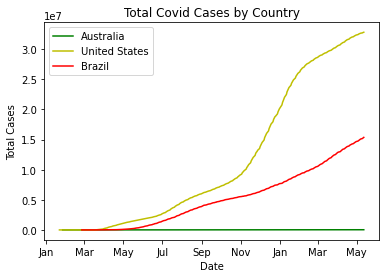

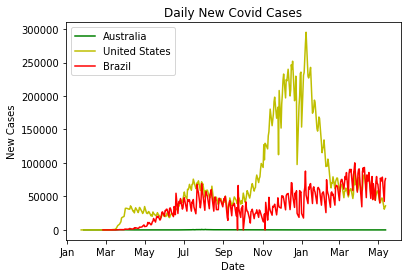

In [20]:
#Plot Cases
import matplotlib.dates as mdates

#Graph 1
x = dfmerge['date']
plt.plot(x,dfmerge['total_cases_au'], '-g', label='Australia')
# plt.plot(x,dfmerge['total_cases_sp'], '--g', label='Singapore')
# plt.plot(x,dfmerge['total_cases_mx'], '-y', label='Mexico')
# plt.plot(x,dfmerge['total_cases_uk'], '--y', label='United Kingdom')
plt.plot(x,dfmerge['total_cases_us'], '-y', label='United States')
plt.plot(x,dfmerge['total_cases_bz'], '-r', label='Brazil')

plt.title('Total Covid Cases by Country')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()

#Graph 2
x = dfmerge['date']
plt.plot(x,dfmerge['new_cases_au'], '-g', label='Australia')
# plt.plot(x,dfmerge['new_cases_sp'], '--g', label='Singapore')
# plt.plot(x,dfmerge['new_cases_mx'], '-y', label='Mexico')
# plt.plot(x,dfmerge['new_cases_uk'], '--y', label='United Kingdom')
plt.plot(x,dfmerge['new_cases_us'], '-y', label='United States')
plt.plot(x,dfmerge['new_cases_bz'], '-r', label='Brazil')

plt.title('Daily New Covid Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()



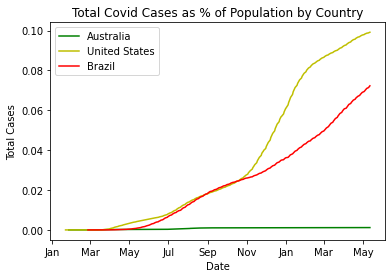

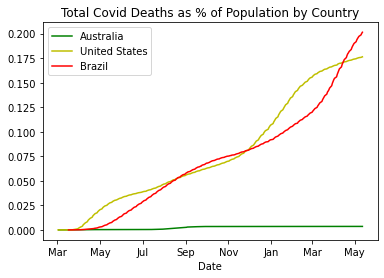

In [21]:
#% of Popualtion
#Graph 3
x = dfmerge['date']
plt.plot(x,dfmerge['total_cases_au']/population['Australia'], '-g', label='Australia')
# plt.plot(x,dfmerge['total_cases_sp']/population['Singapore'], '--g', label='Singapore')
# plt.plot(x,dfmerge['total_cases_mx']/population['Mexico'], '-y', label='Mexico')
# plt.plot(x,dfmerge['total_cases_uk']/population['United Kingdom'], '--y', label='United Kingdom')
plt.plot(x,dfmerge['total_cases_us']/population['United States'], '-y', label='United States')
plt.plot(x,dfmerge['total_cases_bz']/population['Brazil'], '-r', label='Brazil')

plt.title('Total Covid Cases as % of Population by Country')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()

#Graph 4
x = dfmerge['date']
plt.plot(x,(dfmerge['total_deaths_au']*100)/population['Australia'], '-g', label='Australia')
# plt.plot(x,(dfmerge['total_deaths_sp']*100)/population['Singapore'], '--g', label='Singapore')
# plt.plot(x,(dfmerge['total_deaths_mx']*100)/population['Mexico'], '-y', label='Mexico')
# plt.plot(x,(dfmerge['total_deaths_uk']*100)/population['United Kingdom'], '--y', label='United Kingdom')
plt.plot(x,(dfmerge['total_deaths_us']*100)/population['United States'], '-y', label='United States')
plt.plot(x,(dfmerge['total_deaths_bz']*100)/population['Brazil'], '-r', label='Brazil')

plt.title('Total Covid Deaths as % of Population by Country')
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()


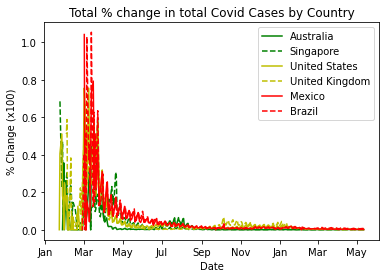

In [22]:
#Plot Cases
x = dfmerge['date']
plt.plot(x,dfmerge['p_total_cases_au'], '-g', label='Australia')
plt.plot(x,dfmerge['p_total_cases_sp'], '--g', label='Singapore')
plt.plot(x,dfmerge['p_total_cases_us'], '-y', label='United States')
plt.plot(x,dfmerge['p_total_cases_uk'], '--y', label='United Kingdom')
plt.plot(x,dfmerge['p_total_cases_mx'], '-r', label='Mexico')
plt.plot(x,dfmerge['p_total_cases_bz'], '--r', label='Brazil')
plt.title('Total % change in total Covid Cases by Country')
plt.xlabel('Date')
plt.ylabel('% Change (x100)')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()

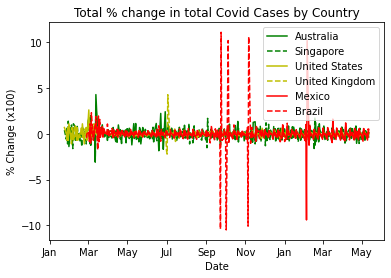

In [23]:
#Plot Cases
x = dfmerge['date']
plt.plot(x,dfmerge['p_new_cases_au'], '-g', label='Australia')
plt.plot(x,dfmerge['p_new_cases_sp'], '--g', label='Singapore')
plt.plot(x,dfmerge['p_new_cases_us'], '-y', label='United States')
plt.plot(x,dfmerge['p_new_cases_uk'], '--y', label='United Kingdom')
plt.plot(x,dfmerge['p_new_cases_mx'], '-r', label='Mexico')
plt.plot(x,dfmerge['p_new_cases_bz'], '--r', label='Brazil')
plt.title('Total % change in total Covid Cases by Country')
plt.xlabel('Date')
plt.ylabel('% Change (x100)')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()

In [24]:
#Realised Vols
dfRV = pd.read_csv('rv.zip')
display(dfRV.head())

dfRVnew = dfRV[['Unnamed: 0','Symbol','rv5']]
dfRVnew.rename(columns={'Unnamed: 0':'Date'},inplace=True)
dfRVnew['Date'] = pd.to_datetime(dfRVnew['Date'], utc=True)

,Unnamed: 0,Symbol,rv10,open_to_close,bv,rk_th2,rv5_ss,rsv,close_time,open_time,rk_twoscale,rsv_ss,medrv,rv5,rv10_ss,close_price,open_price,bv_ss,rk_parzen,nobs
0,2000-01-03 00:00:00+00:00,.AEX,0.000178,-0.000340,0.000100,0.000102,0.000130,0.000046,163015.0,90101.0,0.000103,0.000046,0.000050,0.000130,0.000178,675.44,675.67,0.000100,0.000179,1795.0
1,2000-01-04 00:00:00+00:00,.AEX,0.000261,-0.033606,0.000207,0.000201,0.000201,0.000147,163016.0,90416.0,0.000199,0.000147,0.000075,0.000201,0.000261,642.25,664.20,0.000207,0.000423,1785.0
2,2000-01-05 00:00:00+00:00,.AEX,0.000714,-0.001675,0.000361,0.000345,0.000491,0.000328,163016.0,90016.0,0.000325,0.000328,0.000166,0.000491,0.000714,632.31,633.37,0.000361,0.000324,1801.0
3,2000-01-06 00:00:00+00:00,.AEX,0.000182,-0.013130,0.000258,0.000221,0.000225,0.000116,163002.0,90016.0,0.000218,0.000116,0.000152,0.000225,0.000182,624.21,632.46,0.000258,0.000219,1799.0
4,2000-01-07 00:00:00+00:00,.AEX,0.000157,0.025013,0.000130,0.000123,0.000138,0.000048,163016.0,90046.0,0.000126,0.000048,0.000039,0.000138,0.000157,644.86,628.93,0.000130,0.000155,1798.0


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
#New Date Column


#Create RV Country DF
def dfRVfunc(country):
    dfnew1 = (dfRVnew[dfRVnew['Symbol'] == country])
    return(dfnew1.reset_index(drop=True))

dfBrazilRV = dfRVfunc('.BVSP')
dfUSRV = dfRVfunc('.SPX')
dfUKRV = dfRVfunc('.FTSE')
dfAusRV = dfRVfunc('.AORD')
dfMexRV = dfRVfunc('.MXX')
dfSingRV = dfRVfunc('.STI')

display(dfBrazilRV)
display(dfUSRV)

#Drop Date below 31/12/2019
def dropdate(df,changedate):
    df['Date'] = df['Date']+dt.timedelta(hours = 1)
    display(df['Date'])
    df['Date'] = pd.to_datetime(df['Date'], utc=True)
    df.drop(df[df['Date'].dt.year < 2020].index, inplace=True)
    if changedate == 1:
        df['Date'] = df['Date'].dt.date 
    else:
        df['Date'] = df['Date'].dt.date
    df.reset_index(inplace=True, drop=True)
    
dropdate(dfBrazilRV,0)
dropdate(dfUSRV,0)
dropdate(dfUKRV,0)
dropdate(dfAusRV,0)
dropdate(dfMexRV,0)
dropdate(dfSingRV,1)

strng1 = ['rv5']
rename(dfAusRV,strng1,'au')
rename(dfUSRV,strng1,'us')
rename(dfBrazilRV,strng1,'bz')
rename(dfSingRV,strng1,'sp')
rename(dfUKRV,strng1,'uk')
rename(dfMexRV,strng1,'mx')

display(dfBrazilRV.tail())
display(dfUSRV)
display(dfUKRV[320:339])
display(dfAusRV)
display(dfMexRV)
display(dfSingRV)


,Date,Symbol,rv5
0,2000-01-03 00:00:00+00:00,.BVSP,0.000338
1,2000-01-04 00:00:00+00:00,.BVSP,0.000588
2,2000-01-05 00:00:00+00:00,.BVSP,0.000846
3,2000-01-06 00:00:00+00:00,.BVSP,0.000451
4,2000-01-07 00:00:00+00:00,.BVSP,0.000194
...,...,...,...
5250,2021-05-09 23:00:00+00:00,.BVSP,0.000021
5251,2021-05-10 23:00:00+00:00,.BVSP,0.000053
5252,2021-05-11 23:00:00+00:00,.BVSP,0.000047
5253,2021-05-12 23:00:00+00:00,.BVSP,0.000080


,Date,Symbol,rv5
0,2000-01-03 00:00:00+00:00,.SPX,0.000141
1,2000-01-04 00:00:00+00:00,.SPX,0.000224
2,2000-01-05 00:00:00+00:00,.SPX,0.000314
3,2000-01-06 00:00:00+00:00,.SPX,0.000131
4,2000-01-07 00:00:00+00:00,.SPX,0.000094
...,...,...,...
5351,2021-05-09 23:00:00+00:00,.SPX,0.000024
5352,2021-05-10 23:00:00+00:00,.SPX,0.000136
5353,2021-05-11 23:00:00+00:00,.SPX,0.000073
5354,2021-05-12 23:00:00+00:00,.SPX,0.000117


0      2000-01-03 01:00:00+00:00
1      2000-01-04 01:00:00+00:00
2      2000-01-05 01:00:00+00:00
3      2000-01-06 01:00:00+00:00
4      2000-01-07 01:00:00+00:00
                  ...           
5250   2021-05-10 00:00:00+00:00
5251   2021-05-11 00:00:00+00:00
5252   2021-05-12 00:00:00+00:00
5253   2021-05-13 00:00:00+00:00
5254   2021-05-14 00:00:00+00:00
Name: Date, Length: 5255, dtype: datetime64[ns, UTC]

0      2000-01-03 01:00:00+00:00
1      2000-01-04 01:00:00+00:00
2      2000-01-05 01:00:00+00:00
3      2000-01-06 01:00:00+00:00
4      2000-01-07 01:00:00+00:00
                  ...           
5351   2021-05-10 00:00:00+00:00
5352   2021-05-11 00:00:00+00:00
5353   2021-05-12 00:00:00+00:00
5354   2021-05-13 00:00:00+00:00
5355   2021-05-14 00:00:00+00:00
Name: Date, Length: 5356, dtype: datetime64[ns, UTC]

0      2000-01-04 01:00:00+00:00
1      2000-01-05 01:00:00+00:00
2      2000-01-06 01:00:00+00:00
3      2000-01-07 01:00:00+00:00
4      2000-01-10 01:00:00+00:00
                  ...           
5382   2021-05-10 00:00:00+00:00
5383   2021-05-11 00:00:00+00:00
5384   2021-05-12 00:00:00+00:00
5385   2021-05-13 00:00:00+00:00
5386   2021-05-14 00:00:00+00:00
Name: Date, Length: 5387, dtype: datetime64[ns, UTC]

0      2000-01-04 01:00:00+00:00
1      2000-01-05 01:00:00+00:00
2      2000-01-06 01:00:00+00:00
3      2000-01-07 01:00:00+00:00
4      2000-01-10 01:00:00+00:00
                  ...           
5390   2021-05-10 00:00:00+00:00
5391   2021-05-11 00:00:00+00:00
5392   2021-05-12 00:00:00+00:00
5393   2021-05-13 00:00:00+00:00
5394   2021-05-14 00:00:00+00:00
Name: Date, Length: 5395, dtype: datetime64[ns, UTC]

0      2000-01-03 01:00:00+00:00
1      2000-01-04 01:00:00+00:00
2      2000-01-05 01:00:00+00:00
3      2000-01-06 01:00:00+00:00
4      2000-01-07 01:00:00+00:00
                  ...           
5351   2021-05-10 00:00:00+00:00
5352   2021-05-11 00:00:00+00:00
5353   2021-05-12 00:00:00+00:00
5354   2021-05-13 00:00:00+00:00
5355   2021-05-14 00:00:00+00:00
Name: Date, Length: 5356, dtype: datetime64[ns, UTC]

0      2000-01-03 01:00:00+00:00
1      2000-01-04 01:00:00+00:00
2      2000-01-05 01:00:00+00:00
3      2000-01-06 01:00:00+00:00
4      2000-01-07 01:00:00+00:00
                  ...           
3410   2021-05-07 00:00:00+00:00
3411   2021-05-10 00:00:00+00:00
3412   2021-05-11 00:00:00+00:00
3413   2021-05-12 00:00:00+00:00
3414   2021-05-14 00:00:00+00:00
Name: Date, Length: 3415, dtype: datetime64[ns, UTC]

,Date,Symbol,rv5_bz
324,2021-05-10,.BVSP,0.000021
325,2021-05-11,.BVSP,0.000053
326,2021-05-12,.BVSP,0.000047
327,2021-05-13,.BVSP,0.000080
328,2021-05-14,.BVSP,0.000069


,Date,Symbol,rv5_us
0,2020-01-02,.SPX,0.000015
1,2020-01-03,.SPX,0.000033
2,2020-01-06,.SPX,0.000011
3,2020-01-07,.SPX,0.000012
4,2020-01-08,.SPX,0.000024
...,...,...,...
334,2021-05-10,.SPX,0.000024
335,2021-05-11,.SPX,0.000136
336,2021-05-12,.SPX,0.000073
337,2021-05-13,.SPX,0.000117


,Date,Symbol,rv5_uk
320,2021-04-12,.FTSE,0.000038
321,2021-04-13,.FTSE,0.000035
322,2021-04-14,.FTSE,0.000020
323,2021-04-15,.FTSE,0.000031
324,2021-04-16,.FTSE,0.000027
325,2021-04-19,.FTSE,0.000024
326,2021-04-20,.FTSE,0.000046
327,2021-04-21,.FTSE,0.000044
328,2021-04-22,.FTSE,0.000024
329,2021-04-23,.FTSE,0.000027


,Date,Symbol,rv5_au
0,2020-01-02,.AORD,0.000022
1,2020-01-03,.AORD,0.000116
2,2020-01-06,.AORD,0.000038
3,2020-01-07,.AORD,0.000040
4,2020-01-08,.AORD,0.000039
...,...,...,...
341,2021-05-10,.AORD,0.000027
342,2021-05-11,.AORD,0.000041
343,2021-05-12,.AORD,0.000041
344,2021-05-13,.AORD,0.000040


,Date,Symbol,rv5_mx
0,2020-01-02,.MXX,0.000079
1,2020-01-03,.MXX,0.000086
2,2020-01-06,.MXX,0.000031
3,2020-01-07,.MXX,0.000029
4,2020-01-08,.MXX,0.000026
...,...,...,...
335,2021-05-10,.MXX,0.000119
336,2021-05-11,.MXX,0.000046
337,2021-05-12,.MXX,0.000047
338,2021-05-13,.MXX,0.000057


,Date,Symbol,rv5_sp
0,2020-01-02,.STI,0.000023
1,2020-01-03,.STI,0.000034
2,2020-01-06,.STI,0.000022
3,2020-01-07,.STI,0.000022
4,2020-01-08,.STI,0.000041
...,...,...,...
337,2021-05-07,.STI,0.000026
338,2021-05-10,.STI,0.000023
339,2021-05-11,.STI,0.000033
340,2021-05-12,.STI,0.000040


In [26]:
#Merge Realised Volatility

def colsmrg(strng):
    colsmrg1 = ['Date','rv5_'+strng]
    return(colsmrg1)
    
#Left-on & Right-on identify which columns to merge on (joining keys).
dfmerge1 = pd.merge(dfAusRV, dfUSRV[colsmrg('us')], left_on = ['Date'], right_on = 
            ['Date'], how = 'left')

dfmerge1 = pd.merge(dfmerge1, dfBrazilRV[colsmrg('bz')], left_on = ['Date'], right_on = 
            ['Date'], how = 'left')

dfmerge1 = pd.merge(dfmerge1, dfUKRV[colsmrg('uk')], left_on = ['Date'], right_on = 
            ['Date'], how = 'left')

dfmerge1 = pd.merge(dfmerge1, dfSingRV[colsmrg('sp')], left_on = ['Date'], right_on = 
            ['Date'], how = 'left')

dfmerge1 = pd.merge(dfmerge1, dfMexRV[colsmrg('mx')], left_on = ['Date'], right_on = 
            ['Date'], how = 'left')

dfmerge1.drop('Symbol', inplace=True, axis=1)

dfmerge1.Date = pd.to_datetime(dfmerge1['Date'], format='%Y-%m-%d')

display(dfmerge1)

,Date,rv5_au,rv5_us,rv5_bz,rv5_uk,rv5_sp,rv5_mx
0,2020-01-02,0.000022,0.000015,0.000032,0.000059,0.000023,0.000079
1,2020-01-03,0.000116,0.000033,0.000057,0.000051,0.000034,0.000086
2,2020-01-06,0.000038,0.000011,0.000080,0.000048,0.000022,0.000031
3,2020-01-07,0.000040,0.000012,0.000025,0.000022,0.000022,0.000029
4,2020-01-08,0.000039,0.000024,0.000067,0.000043,0.000041,0.000026
...,...,...,...,...,...,...,...
341,2021-05-10,0.000027,0.000024,0.000021,0.000031,0.000023,0.000119
342,2021-05-11,0.000041,0.000136,0.000053,0.000280,0.000033,0.000046
343,2021-05-12,0.000041,0.000073,0.000047,0.000072,0.000040,0.000047
344,2021-05-13,0.000040,0.000117,0.000080,0.000283,NaN,0.000057


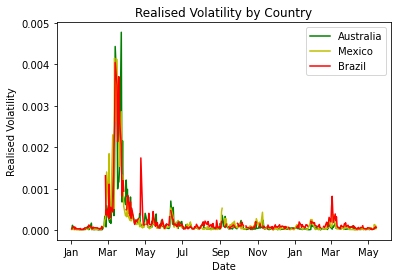

Text(0, 0.5, 'Realised Volatility')

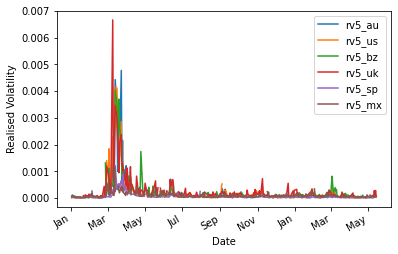

In [27]:
#Graph of Realised Volatility
# fig = plt.figure(figsize = (15, 7))
# ax1 = fig.add_subplot(1,1,1) # Add the left most of two side-by-side plots as "ax1" 
# ax1.plot(dfmerge1.Date, dfmerge1[['rv5_au','rv5_us','rv5_bz','rv5_sp','rv5_mx']]) # Make this a bar plot of log value
# ax1.set_ylabel('Log Dollar Volume in Broker Dark Pools') # Set the y-label of ax1

x = dfmerge1['Date']
plt.plot(x,dfmerge1['rv5_au'], '-g', label='Australia')
plt.plot(x,dfmerge1['rv5_us'], '-y', label='Mexico')
plt.plot(x,dfmerge1['rv5_bz'], '-r', label='Brazil')
plt.title('Realised Volatility by Country')
plt.xlabel('Date')
plt.ylabel('Realised Volatility')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()



dfmerge1.plot(x="Date")
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.rcParams['figure.figsize'] = [10, 7]
plt.ylabel('Realised Volatility')



In [28]:
#Merge RV and Covid Cases

#Left-on & Right-on identify which columns to merge on (joining keys).
dfmerge1['Date'] = dfmerge1['Date'].astype(str)
dfmerge1['Date'] = dfmerge1['Date'].str.replace('\D', '').astype(int)
dfmerge['date'] = dfmerge['date'].astype(str)
dfmerge['date'] = dfmerge['date'].str.replace('\D', '').astype(int)


dfmerge2 = pd.merge(dfmerge, dfmerge1[['Date','rv5_au','rv5_us','rv5_bz','rv5_uk','rv5_sp','rv5_mx']], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge2.drop('Date', inplace=True, axis=1)
display(dfmerge2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,date,new_cases_us,total_cases_us,total_deaths_us,p_new_cases_us,p_total_cases_us,new_cases_wd,total_cases_wd,total_deaths_wd,p_new_cases_wd,...,total_cases_mx,total_deaths_mx,p_new_cases_mx,p_total_cases_mx,rv5_au,rv5_us,rv5_bz,rv5_uk,rv5_sp,rv5_mx
0,20210512,35878.000000,3.281478e+07,583685.000000,0.06408,0.001094,760099.0,1.604509e+08,3.331259e+06,0.028864,...,2371483.0,219590.000000,0.487694,0.001304,0.000041,0.000073,0.000047,0.000072,0.000040,0.000047
1,20210511,33651.000000,3.277891e+07,582837.000000,0.084389,0.001997,738473.0,1.596908e+08,3.317325e+06,0.077595,...,2368393.0,219323.000000,0.207937,0.001165,0.000041,0.000136,0.000053,0.000280,0.000033,0.000046
2,20210510,30927.666667,3.271353e+07,581807.666667,-0.424615,0.001868,683338.0,1.583238e+08,3.293219e+06,-0.196311,...,2365635.0,219000.666667,-0.680308,0.001591,0.000027,0.000024,0.000021,0.000031,0.000023,0.000119
3,20210507,47289.000000,3.265247e+07,580901.000000,-0.004747,0.001449,831558.0,1.569023e+08,3.269856e+06,-0.04516,...,2361874.0,218657.000000,0.066907,0.001289,0.000012,0.000025,0.000020,0.000056,0.000026,0.000087
4,20210506,47514.000000,3.260518e+07,580148.000000,0.060267,0.001458,869972.0,1.560707e+08,3.256121e+06,0.033603,...,2358831.0,218173.000000,-0.059653,0.001207,0.000030,0.000058,0.000037,0.000042,0.000031,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,20200128,0.000000,5.000000e+00,NaN,-0.693147,0.182322,2651.0,5.578000e+03,1.310000e+02,1.386294,...,NaN,NaN,NaN,NaN,0.000090,0.000020,0.000054,0.000048,0.000036,0.000023
337,20200127,1.000000,4.000000e+00,NaN,0.0,0.510826,662.0,2.159333e+03,6.000000e+01,0.837293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,20200124,1.000000,2.000000e+00,NaN,0.693147,0.405465,286.0,9.410000e+02,2.600000e+01,1.064362,...,NaN,NaN,NaN,NaN,0.000015,0.000054,0.000056,0.000120,0.000007,0.000039
339,20200123,0.000000,1.000000e+00,NaN,NaN,0.0,98.0,6.550000e+02,1.800000e+01,4.59512,...,NaN,NaN,NaN,NaN,0.000025,0.000025,0.000054,0.000033,0.000020,0.000029


In [29]:
#Indices
IxBrazil = pd.read_excel('indexs/bovespa.xlsx')
IxAus = pd.read_excel('indexs/aords.xlsx')
IxUS = pd.read_excel('indexs/us.xlsx')
IxUK = pd.read_excel('indexs/uk.xlsx')
IxSing = pd.read_excel('indexs/singapore.xlsx')
IxMex = pd.read_excel('indexs/mexico.xlsx')

def ret(df,strng):
    df['ret_'+strng] = ""
    for n in range(df.shape[0]-1):
        df['ret_'+strng][n+1] = np.log(df.Close[n+1]/df.Close[n])
    df['ret_'+strng][0] = None
#     df['ret_'+strng].astype(float)

    
#     int(float('55063.000000'))
# def datecl(df):
#     df['Date'] = pd.to_datetime(df['Date'], utc=True)

#Get log returns
ret(IxBrazil,'bz')
ret(IxAus,'au')
ret(IxUS,'us')
ret(IxUK,'uk')
ret(IxSing,'sp')
ret(IxMex,'mx')

#Simply Date
def simpdate(df):
    df['Date'] = df['Date'].dt.date
    df['Date'] = df['Date'].astype(str)
    df['Date'] = df['Date'].str.replace('\D', '').astype(int)
    
display(IxBrazil)
display(IxAus)
display(IxUS)
display(IxUK)
display(IxSing)
display(IxMex)



/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Date,Close,ret_bz
0,2020-01-02 16:56:00,118573.10,None
1,2020-01-03 17:50:00,117706.66,-0.007334
2,2020-01-06 16:56:00,116877.92,-0.007066
3,2020-01-07 16:56:00,116661.94,-0.00185
4,2020-01-08 16:56:00,116247.03,-0.003563
...,...,...,...
331,2021-05-06 16:56:00,119920.61,0.002974
332,2021-05-07 16:56:00,122038.11,0.017503
333,2021-05-10 16:56:00,121909.03,-0.001058
334,2021-05-11 16:56:00,122964.01,0.008617


,Date,Close,ret_au
0,2020-01-02 16:00:00,6809.96,None
1,2020-01-03 16:00:00,6855.20,0.006621
2,2020-01-06 16:00:00,6857.40,0.000321
3,2020-01-07 16:00:00,6943.60,0.012492
4,2020-01-08 16:00:00,6930.10,-0.001946
...,...,...,...
341,2021-05-07 16:00:00,7325.20,0.002625
342,2021-05-10 16:00:00,7419.80,0.012832
343,2021-05-11 16:00:00,7331.60,-0.011958
344,2021-05-12 16:00:00,7281.10,-0.006912


,Date,Close,ret_us
0,2019-12-31 16:00:00,3230.78,None
1,2020-01-02 16:00:00,3257.85,0.008344
2,2020-01-03 16:00:00,3234.85,-0.007085
3,2020-01-06 16:00:00,3246.28,0.003527
4,2020-01-07 16:00:00,3237.18,-0.002807
...,...,...,...
339,2021-05-06 16:00:00,4201.62,0.008132
340,2021-05-07 16:00:00,4232.60,0.007346
341,2021-05-10 16:00:00,4188.43,-0.01049
342,2021-05-11 16:00:00,4152.10,-0.008712


,Date,Close,ret_uk
0,2019-12-31 12:30:00,7542.44,None
1,2020-01-02 16:30:00,7604.30,0.008168
2,2020-01-03 16:30:00,7622.40,0.002377
3,2020-01-06 16:30:00,7575.34,-0.006193
4,2020-01-07 16:30:00,7573.85,-0.000197
...,...,...,...
340,2021-05-06 16:30:00,7076.17,0.005224
341,2021-05-07 16:30:00,7129.71,0.007538
342,2021-05-10 16:30:00,7123.68,-0.000846
343,2021-05-11 16:30:00,6947.99,-0.024972


,Date,Close,ret_sp
0,2019-12-31 16:00:00,963.54,None
1,2020-01-02 16:00:00,970.36,0.007053
2,2020-01-03 16:00:00,965.22,-0.005311
3,2020-01-06 16:00:00,959.76,-0.005673
4,2020-01-07 16:00:00,967.04,0.007557
...,...,...,...
339,2021-05-06 16:00:00,962.54,0.007027
340,2021-05-07 16:00:00,973.81,0.011641
341,2021-05-10 16:00:00,970.33,-0.00358
342,2021-05-11 16:00:00,957.74,-0.01306


,Date,Close,ret_mx
0,2019-12-31 16:00:00,45.03,None
1,2020-01-02 16:00:00,46.26,0.026949
2,2020-01-03 16:00:00,45.92,-0.007377
3,2020-01-06 16:00:00,46.13,0.004563
4,2020-01-07 16:00:00,45.70,-0.009365
...,...,...,...
339,2021-05-06 16:00:00,46.50,0.016698
340,2021-05-07 16:00:00,47.05,0.011759
341,2021-05-10 16:00:00,47.50,0.009519
342,2021-05-11 16:00:00,47.05,-0.009519


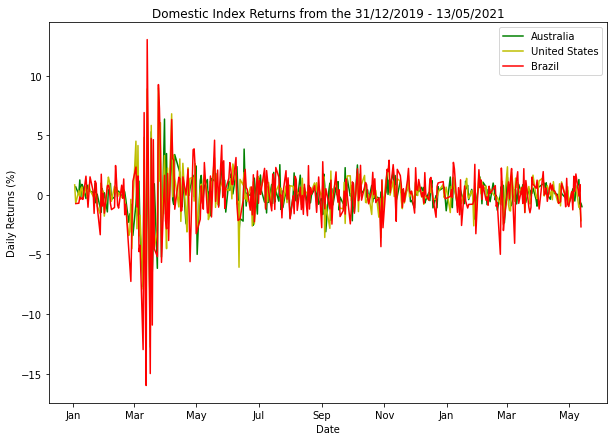

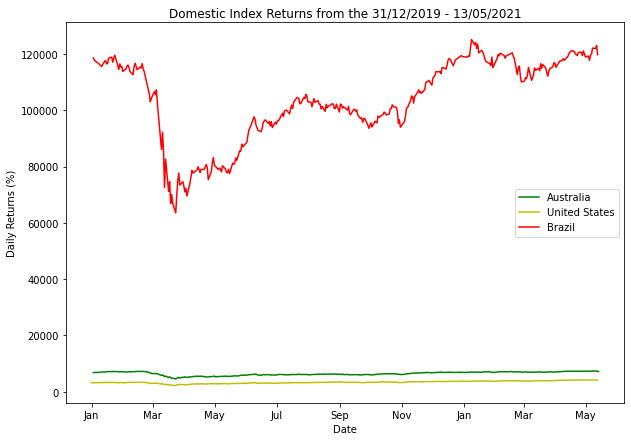

In [32]:
#Plot Cases
plt.plot(IxAus['Date'],IxAus['ret_au']*100, '-g', label='Australia')
# plt.plot(IxSing['Date'],IxSing['ret_sp']*100, '--g', label='Singapore')
# plt.plot(IxMex['Date'],IxMex['ret_mx']*100, '-y', label='Mexico')
# plt.plot(IxUK['Date'],IxUK['ret_uk']*100, '--y', label='United Kingdom')
plt.plot(IxUS['Date'],IxUS['ret_us']*100, '-y', label='United States')
plt.plot(IxBrazil['Date'],IxBrazil['ret_bz']*100, '-r', label='Brazil')
plt.title('Domestic Index Returns from the 31/12/2019 - 13/05/2021')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()

x = dfmerge['date']
plt.plot(IxAus['Date'],IxAus['Close'], '-g', label='Australia')
# plt.plot(IxSing['Date'],IxSing['Close'], '--g', label='Singapore')
# plt.plot(IxMex['Date'],IxMex['Close'], '-y', label='Mexico')
# plt.plot(IxUK['Date'],IxUK['Close'], '--y', label='United Kingdom')
plt.plot(IxUS['Date'],IxUS['Close'], '-y', label='United States')
plt.plot(IxBrazil['Date'],IxBrazil['Close'], '-r', label='Brazil')
plt.title('Domestic Index Returns from the 31/12/2019 - 13/05/2021')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.legend()
dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
# Display a figure.
plt.show()

In [46]:
simpdate(IxBrazil)
simpdate(IxAus)
simpdate(IxUS)
simpdate(IxUK)
simpdate(IxSing)
simpdate(IxMex)

display(IxBrazil)
display(IxAus)
display(IxUS)
display(IxUK)
display(IxSing)
display(IxMex)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Close,ret_bz
0,20200102,118573.10,None
1,20200103,117706.66,-0.007334
2,20200106,116877.92,-0.007066
3,20200107,116661.94,-0.00185
4,20200108,116247.03,-0.003563
...,...,...,...
331,20210506,119920.61,0.002974
332,20210507,122038.11,0.017503
333,20210510,121909.03,-0.001058
334,20210511,122964.01,0.008617


,Date,Close,ret_au
0,20200102,6809.96,None
1,20200103,6855.20,0.006621
2,20200106,6857.40,0.000321
3,20200107,6943.60,0.012492
4,20200108,6930.10,-0.001946
...,...,...,...
341,20210507,7325.20,0.002625
342,20210510,7419.80,0.012832
343,20210511,7331.60,-0.011958
344,20210512,7281.10,-0.006912


,Date,Close,ret_us
0,20191231,3230.78,None
1,20200102,3257.85,0.008344
2,20200103,3234.85,-0.007085
3,20200106,3246.28,0.003527
4,20200107,3237.18,-0.002807
...,...,...,...
339,20210506,4201.62,0.008132
340,20210507,4232.60,0.007346
341,20210510,4188.43,-0.01049
342,20210511,4152.10,-0.008712


,Date,Close,ret_uk
0,20191231,7542.44,None
1,20200102,7604.30,0.008168
2,20200103,7622.40,0.002377
3,20200106,7575.34,-0.006193
4,20200107,7573.85,-0.000197
...,...,...,...
340,20210506,7076.17,0.005224
341,20210507,7129.71,0.007538
342,20210510,7123.68,-0.000846
343,20210511,6947.99,-0.024972


,Date,Close,ret_sp
0,20191231,963.54,None
1,20200102,970.36,0.007053
2,20200103,965.22,-0.005311
3,20200106,959.76,-0.005673
4,20200107,967.04,0.007557
...,...,...,...
339,20210506,962.54,0.007027
340,20210507,973.81,0.011641
341,20210510,970.33,-0.00358
342,20210511,957.74,-0.01306


,Date,Close,ret_mx
0,20191231,45.03,None
1,20200102,46.26,0.026949
2,20200103,45.92,-0.007377
3,20200106,46.13,0.004563
4,20200107,45.70,-0.009365
...,...,...,...
339,20210506,46.50,0.016698
340,20210507,47.05,0.011759
341,20210510,47.50,0.009519
342,20210511,47.05,-0.009519


In [47]:
#Merge to Big Data
dfm = [IxBrazil,IxAus,IxUS,IxUK,IxSing,IxMex]
#Left-on & Right-on identify which columns to merge on (joining keys).

def colsmrg(strng):
    colsmrg2 = ['Date','ret_'+strng]
    return(colsmrg2)
    
#Left-on & Right-on identify which columns to merge on (joining keys).
dfmerge3 = pd.merge(dfmerge2, IxBrazil[colsmrg('bz')], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge3.drop('Date', inplace=True, axis=1)

dfmerge3 = pd.merge(dfmerge3, IxAus[colsmrg('au')], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge3.drop('Date', inplace=True, axis=1)

dfmerge3 = pd.merge(dfmerge3, IxUS[colsmrg('us')], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge3.drop('Date', inplace=True, axis=1)

dfmerge3 = pd.merge(dfmerge3, IxUK[colsmrg('uk')], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge3.drop('Date', inplace=True, axis=1)

dfmerge3 = pd.merge(dfmerge3, IxSing[colsmrg('sp')], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge3.drop('Date', inplace=True, axis=1)

dfmerge3 = pd.merge(dfmerge3, IxMex[colsmrg('mx')], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge3.drop('Date', inplace=True, axis=1)

# dfmerge = pd.merge(dfmerge, dfBrazil[colsmrg('bz')], left_on = ['date'], right_on = 
#             ['date'], how = 'left')

# dfmerge = pd.merge(dfmerge, dfUK[colsmrg('uk')], left_on = ['date'], right_on = 
#             ['date'], how = 'left')

# dfmerge = pd.merge(dfmerge, dfSing[colsmrg('sp')], left_on = ['date'], right_on = 
#             ['date'], how = 'left')

# dfmerge = pd.merge(dfmerge, dfMex[colsmrg('mx')], left_on = ['date'], right_on = 
#             ['date'], how = 'left')

display(dfmerge3)

,date,new_cases_us,total_cases_us,total_deaths_us,p_new_cases_us,p_total_cases_us,new_cases_wd,total_cases_wd,total_deaths_wd,p_new_cases_wd,...,rv5_bz,rv5_uk,rv5_sp,rv5_mx,ret_bz,ret_au,ret_us,ret_uk,ret_sp,ret_mx
0,20210512,35878.000000,3.281478e+07,583685.000000,0.06408,0.001094,760099.0,1.604509e+08,3.331259e+06,0.028864,...,0.000047,0.000072,0.000040,0.000047,-0.026819,-0.006912,-0.021683,0.008119,-0.00999,-0.022352
1,20210511,33651.000000,3.277891e+07,582837.000000,0.084389,0.001997,738473.0,1.596908e+08,3.317325e+06,0.077595,...,0.000053,0.000280,0.000033,0.000046,0.008617,-0.011958,-0.008712,-0.024972,-0.01306,-0.009519
2,20210510,30927.666667,3.271353e+07,581807.666667,-0.424615,0.001868,683338.0,1.583238e+08,3.293219e+06,-0.196311,...,0.000021,0.000031,0.000023,0.000119,-0.001058,0.012832,-0.01049,-0.000846,-0.00358,0.009519
3,20210507,47289.000000,3.265247e+07,580901.000000,-0.004747,0.001449,831558.0,1.569023e+08,3.269856e+06,-0.04516,...,0.000020,0.000056,0.000026,0.000087,0.017503,0.002625,0.007346,0.007538,0.011641,0.011759
4,20210506,47514.000000,3.260518e+07,580148.000000,0.060267,0.001458,869972.0,1.560707e+08,3.256121e+06,0.033603,...,0.000037,0.000042,0.000031,0.000049,0.002974,-0.005215,0.008132,0.005224,0.007027,0.016698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,20200128,0.000000,5.000000e+00,NaN,-0.693147,0.182322,2651.0,5.578000e+03,1.310000e+02,1.386294,...,0.000054,0.000048,0.000036,0.000023,0.017295,-0.014656,0.010003,0.009218,-0.019553,0.02557
337,20200127,1.000000,4.000000e+00,NaN,0.0,0.510826,662.0,2.159333e+03,6.000000e+01,0.837293,...,NaN,NaN,NaN,NaN,-0.033453,NaN,-0.015856,-0.023195,-0.004196,-0.028561
338,20200124,1.000000,2.000000e+00,NaN,0.693147,0.405465,286.0,9.410000e+02,2.600000e+01,1.064362,...,0.000056,0.000120,0.000007,0.000039,-0.009679,0.000583,-0.009083,0.010377,0.00179,-0.011031
339,20200123,0.000000,1.000000e+00,NaN,NaN,0.0,98.0,6.550000e+02,1.800000e+01,4.59512,...,0.000054,0.000033,0.000020,0.000029,0.009552,-0.006921,0.00114,-0.008522,-0.00671,-0.007776


In [48]:
dfmerge3['ret_us'].describe()

count     330.000000
unique    330.000000
top         0.014738
freq        1.000000
Name: ret_us, dtype: float64

In [49]:
#Fama French 3 Factors
FF = pd.read_csv('FFfactors.csv')
FF['Date'] = FF['Date'].astype(int)
display(FF)

,Date,Mkt-RF,SMB,HML,RF
0,20191231,0.28,-0.01,0.11,0.007
1,20200102,0.86,-0.85,-0.36,0.006
2,20200103,-0.67,0.37,0.02,0.006
3,20200106,0.36,-0.06,-0.56,0.006
4,20200107,-0.19,-0.01,-0.21,0.006
...,...,...,...,...,...
310,20210325,0.67,1.63,1.37,0.000
311,20210326,1.55,0.20,0.65,0.000
312,20210329,-0.49,-2.39,-0.21,0.000
313,20210330,-0.02,1.52,0.99,0.000


In [50]:
#Merge 3 Factors
dfmerge4 = pd.merge(dfmerge3, FF[['Date','Mkt-RF','SMB','HML','RF']], left_on = ['date'], right_on = 
            ['Date'], how = 'left')

dfmerge4.drop('Date', inplace=True, axis=1)

In [51]:
#Export to CSV
dfmerge4.to_csv('eviewsdata.csv')